In [1]:
from sklearn.datasets import load_breast_cancer
import pandas as pd

breast_cancer_data = load_breast_cancer()

df_data = pd.DataFrame(breast_cancer_data.data, columns=breast_cancer_data.feature_names)
df_labels = pd.DataFrame(breast_cancer_data.target, columns=['target'])

In [2]:
from sklearn.preprocessing import MinMaxScaler

mms = MinMaxScaler()

xscaled = mms.fit_transform(df_data)
#yscaled = mms.fit_transform(df_labels)
print("X_train_scaled : \n", xscaled)
#print("X_test_scaled : \n", yscaled)


X_train_scaled : 
 [[0.52103744 0.0226581  0.54598853 ... 0.91202749 0.59846245 0.41886396]
 [0.64314449 0.27257355 0.61578329 ... 0.63917526 0.23358959 0.22287813]
 [0.60149557 0.3902604  0.59574321 ... 0.83505155 0.40370589 0.21343303]
 ...
 [0.45525108 0.62123774 0.44578813 ... 0.48728522 0.12872068 0.1519087 ]
 [0.64456434 0.66351031 0.66553797 ... 0.91065292 0.49714173 0.45231536]
 [0.03686876 0.50152181 0.02853984 ... 0.         0.25744136 0.10068215]]


In [3]:
from sklearn.model_selection import train_test_split

tdata, vdata, tlabels, vlabels = train_test_split(xscaled, df_labels, test_size = 0.2, random_state = 40)

In [4]:
from sklearn.neighbors import KNeighborsClassifier

classifier = KNeighborsClassifier(n_neighbors = 3)

classifier.fit(tdata, tlabels.values.ravel())

KNeighborsClassifier(n_neighbors=3)

In [5]:
print(classifier.score(vdata, vlabels))

0.9824561403508771


In [14]:
from sklearn.model_selection import KFold

k_list = []
for i in range(3, 50):
    k_list.append(i)
    
cv = KFlod(n_splits=5, random_state=42, shuffle=True)
parameters = {'n_neighbors':k_list, 'metric':['euclidean', 'manhattan']}
model = GridSearchCV(estimator=knn_model, param_grid=parameters, cv=cv, vervose=-1, n_jobs=-1)

NameError: name 'KFlod' is not defined

In [ ]:
print(f"Best Estimator: {model.best_estimator_}")
print(f"Best Params: {model.best_params_}")
print(f"Best Score: {model.best_score_}")

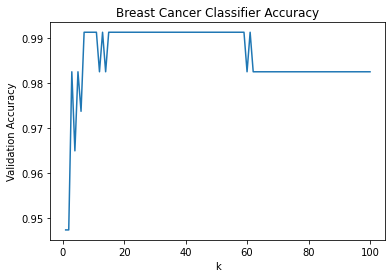

In [6]:
import matplotlib.pyplot as plt
k_list = range(1,101)
accuracies = []
for k in k_list:
    classifier = KNeighborsClassifier(n_neighbors = k)
    classifier.fit(tdata, tlabels.values.ravel())
    accuracies.append(classifier.score(vdata, vlabels.values.ravel()))
plt.plot(k_list, accuracies)
plt.xlabel("k")
plt.ylabel("Validation Accuracy")
plt.title("Breast Cancer Classifier Accuracy")
plt.show()

In [8]:
# test
#pred = knn.predict(x_test)
pred = classifier.predict(vdata)

pred


array([1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0,
       0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 1])

In [9]:
comparison = pd.DataFrame({'prediction':pred, 'ground_truth':vlabels.values.ravel()}) 
comparison

,prediction,ground_truth
0,1,1
1,0,0
2,1,1
3,1,1
4,0,0
...,...,...
109,1,1
110,1,1
111,1,1
112,0,0


In [11]:
from sklearn.metrics import accuracy_score

# check accuracy
print("accuracy : " + str(accuracy_score(vlabels.values.ravel(), pred)) )


accuracy : 0.9824561403508771
